In [4]:
# Import the required librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Get dataset for project

train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [6]:
# Check for missing values

train_data.isnull().sum()

# Observe that there is a single missing value in y-column - meaning: x-column has no input

x    0
y    1
dtype: int64

In [7]:
# Confirm the exact row in y_test that has NaN

train_data[train_data.isnull().any(axis = 1)]

,x,y
213,3530.157369,NaN


In [8]:
# Drop empty row

train_data.dropna(axis = 0, inplace = True)
train_data.isnull().sum()

x    0
y    0
dtype: int64

In [9]:
# Set X and y for train dataset

X_train = pd.DataFrame(data = train_data['x'])
y_train = pd.DataFrame(data = train_data['y'])

In [10]:
# Set X and y for test dataset

X_test = pd.DataFrame(data = test_data['x'])
y_test = pd.DataFrame(data = test_data['y'])

In [11]:
# Convert dataframes to numpy arrays

X = X_train.to_numpy()
X_test = X_test.to_numpy()

y = y_train.to_numpy()
y_test = y_test.to_numpy()

### USEFUL FUNCTIONS

I will create some helper functions for use.
I will create them in a section to keep the notebook organised.

In [12]:
# The Hypothesis

# The hypothesis is a linear equation aka: equation of a straight line.
# theta_0 = intercept
# theta_1 = slope
# The hypothesis function will calculate target values for given features and thetas(i) as (i = 0, 1).

def hypothesis(X, theta_0 = 0, theta_1 = 0):
    """
    calculates target values for a given feature input and thetas(i).
    
    :param X: input - numpy array of floats.
    :param theta_0: intercept - float.
    :param theta_1: slope - float.
    
    """
    
    return theta_0 + (theta_1 * X)

In [13]:
# The Cost Function

# The question: how to pick the line of best fit for the data?.
# This means - how to choose the best value of thetas(i) that fit the data.
# I chose thetas(i) such that hypothesis h(x) is closer to y for all training samples.
# A solution to the above question is to use ORDINARY LEAST SQUARE (OLS) or MEAN SQUARED ERROR (MSE).
# MSE/OLS = (y^ - y); where y^ is predicted target and y is actual target.
# Cost function is denoted by J(theta_0, theta_1).

def J(theta_0, theta_1, X, y):
    """
    calculates total error for given features and theta values.
    
    :param theta_0: intercept - float.
    :param theta_1: slope - float.
    :param X: input - numpy array of floats.
    :param y: input (actual target values) - numpy array of floats.
    
    :return: total error - float.
    
    """
    
    diff = (np.subtract(hypothesis(X, theta_0, theta_1), np.asarray(y)))
    diff_squared = np.square(diff)
    
    return (diff_squared.sum() / (len(X)) * 2)

In [14]:
# The Gradient Descent

# The question: how to minimize cost function J(theta_0, theta_1)?
# Solution to this question is to use gradient descent.
# The gradient descent algorithm updates weight and bias until convergence / global optimum is met.

def gradient_descent(theta_0, theta_1, alpha, X, y):
    """
    calculates the GD for givent features and theta values.
    
    :param theta_0: intercept - float.
    :param theta_1: slope - float.
    :param alpha: learning rate - float.
    :param X: input - numpy array of floats.
    :param y: input (actual target values) - numpy array of floats.
    
    :return: calculated theta_0 and theta(1) - tuple of floats.
    
    """
    
    my_array_0 = (np.subtract(hypothesis(X, theta_0, theta_1), np.asarray(y)))
    my_array_1 = np.matmul(np.transpose(my_array_0), X)
    
    theta_0_temp = (alpha / len(X)) * my_array_0.sum()
    theta_1_temp = (alpha / len(X)) * my_array_1.sum()
    
    new_theta_0 = theta_0 - theta_0_temp
    new_theta_1 = theta_1 - theta_1_temp
    
    return (new_theta_0, new_theta_1)

### TRAINING

Before training, I will initialize some variables: 
initial theta(i) - which I set to 0 and learning rate.
- I will also pick different values for theta(i) to observe their effects on the training.
- I will also decide when the gradient descent (GD) converges by subtracting consecutive cost values.
- If the difference is below my stipulated threshold, it concludes that GD converged.

In [15]:
# Initialize theta_0, theta_1, learning rate and convergence threshold

alpha = 0.0001
theta_0 = 0
theta_1 = 0
conv_thresh = 0.000001

In [16]:
# Calculate initial cost value

diff = J(theta_0, theta_1, X, y)

print('Initial Cost: {}'.format(J(theta_0, theta_1, X, y)))

Initial Cost: 6680.249652357345


Cost: 2972.4043500565017

Iteration: 1
Diff: 3707.8453023008437
Theta 0: 0.004993986917045781
Theta 1: 0.33354245845185376
Cost: 1327.4449440586734

Iteration: 2
Diff: 1644.9594059978283
Theta 0: 0.008319284972241516
Theta 1: 0.5557035214498387
Cost: 597.6703102214115

Iteration: 3
Diff: 729.774633837262
Theta 0: 0.010533127355656115
Theta 1: 0.7036773052035966
Cost: 273.91094300438937

Iteration: 4
Diff: 323.7593672170221
Theta 0: 0.012006667742524593
Theta 1: 0.8022375187713469
Cost: 130.2773839774843

Iteration: 5
Diff: 143.63355902690506
Theta 0: 0.012987118705779484
Theta 1: 0.8678850693676075
Cost: 66.5553687854378

Iteration: 6
Diff: 63.7220151920465
Theta 0: 0.01363913995457535
Theta 1: 0.9116106382126296
Cost: 38.2855461594421

Iteration: 7
Diff: 28.269822625995708
Theta 0: 0.01407240560255936
Theta 1: 0.9407347363616418
Cost: 25.743838614518957

Iteration: 8
Diff: 12.541707544923142
Theta 0: 0.014359965767857044
Theta 1: 0.9601333019877012
Cost: 20.179798347657165

Iteration:

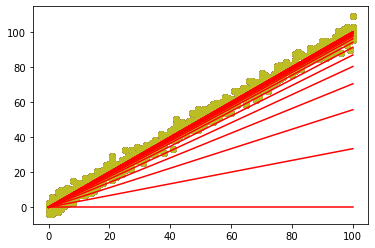

In [17]:
# Count number of iterations

my_iter = 0

while diff >= conv_thresh:
    
    """
    draw current hypothesis and training.
    set to x-y plane.
    draw all hypothesis lines so their changes with each iterations can be seen.
    
    """
    
    my_line = np.linspace(0, 100)
    z = theta_0 + theta_1 * (my_line)
    
    plt.scatter(X, y)
    plt.plot(my_line, z, 'r')
    
    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)
    
    # calculate and assign new theta_0 and theta_1 values
    theta_0, theta_1 = gradient_descent(theta_0, theta_1, alpha, X, y)
    
    # calculate consecutive cost value
    new_cost = J(theta_0, theta_1, X, y)
    
    print('Cost: {}'.format(new_cost))
    
    # calculate difference between consecutive cost values
    diff = initial_cost - new_cost
    
    my_iter += 1
    
    print()
    print('Iteration: {}'.format(my_iter))
    print('Diff: {}'.format(diff))
    print('Theta 0: {}'.format(theta_0))
    print('Theta 1: {}'.format(theta_1))
    
plt.show()

- Observe that after choosing theta(i) values as (0, 0) initially, the number of iterations is 29.
- Now I will add different values to my theta(i) and observe how this affects the training.

In [18]:
# Initialize theta_0, theta_1, learning rate and convergence threshold

alpha = 0.0001
theta_0 = 10
theta_1 = 10
conv_thresh = 0.000001

In [20]:
# Calculate initial cost value

diff = J(theta_0, theta_1, X, y)

# Count number of iterations
my_iter = 0

print('Initial Cost: {}'.format(J(theta_0, theta_1, X, y)))

Initial Cost: 559190.9933932095



Iteration: 10000
Cost: 45.93014426772354
Diff: 0.0015140031191833714

Iteration: 20000
Cost: 34.02382185163236
Diff: 0.0009170027909277678

Iteration: 30000
Cost: 26.812389624868754
Diff: 0.0005554110872729723

Iteration: 40000
Cost: 22.44456277256344
Diff: 0.0003364018942058067

Iteration: 50000
Cost: 19.799053418552464
Diff: 0.0002037522062856567

Iteration: 60000
Cost: 18.19671889870635
Diff: 0.00012340882224748384

Iteration: 70000
Cost: 17.226215464425263
Diff: 7.474636808169066e-05

Iteration: 80000
Cost: 16.638400058662274
Diff: 4.5272448431887824e-05

Iteration: 90000
Cost: 16.282371487255645
Diff: 2.7420657890075972e-05

Iteration: 100000
Cost: 16.06673177721216
Diff: 1.6608169087106717e-05

Iteration: 110000
Cost: 15.936122920838832
Diff: 1.0059251009053582e-05

Iteration: 120000
Cost: 15.857015629516157
Diff: 6.092696335002756e-06

Iteration: 130000
Cost: 15.809101853114026
Diff: 3.6902298781171794e-06

Iteration: 140000
Cost: 15.780081393296362
Diff: 2.2351017996413702e-06

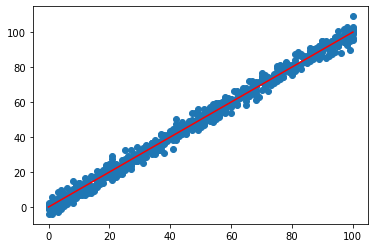

In [21]:
while diff >= conv_thresh:
    # Calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)
    
    # Calculate and assign new theta(i) values
    theta_0, theta_1 = gradient_descent(theta_0, theta_1, alpha, X, y)
    
    # Calculate the consecutive cost values
    new_cost = J(theta_0, theta_1, X, y)
    
    # Calculate the difference between the cost values
    diff = initial_cost - new_cost
    
    # Print for every 10000 iteration
    my_iter += 1
    if my_iter % 10000 == 0:
        print()
        print('Iteration: {}'.format(my_iter))
        print('Cost: {}'.format(new_cost))
        print('Diff: {}'.format(diff))

print()
print('Iteration: {}'.format(my_iter))
print('Diff: {}'.format(diff))
print('Theta 0: {}'.format(theta_0))
print('Theta 1: {}'.format(theta_1))
print('Final Cost: {}'.format(new_cost))
print()

# Plot the final hypothesis and training set to x-y plane
# I will not draw all hypothesis because of high iteration count.
my_line = np.linspace(0, 100)
z = theta_0 + theta_1 * (my_line)
    
plt.scatter(X, y)
plt.plot(my_line, z, 'r')
plt.show()

### EVALUATION

I can finally evaluate my univariate linear regression model using the best theta(i) values gotten in previous cell.
- theta_0: 0.0921504733444104
- theta_1: 0.9976687808481557

Cost of Test Data: 18.952476458611127


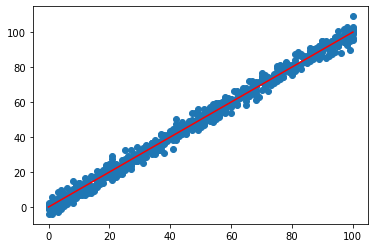

In [22]:
# Calculate cost value for the test data
cost_test = J(theta_0, theta_1, X_test, y_test)

print('Cost of Test Data: {}'.format(cost_test))

# Plot the final hypothesis and training set to x-y plane for test data.
my_line = np.linspace(0, 100)
z = theta_0 + theta_1 * (my_line)
    
plt.scatter(X, y)
plt.plot(my_line, z, 'r')
plt.show()

### CONCLUSION

I have written the python implementation of a univariate linear regression from:
- hypothesis
- cost function
- gradient descent

I have also traine the algorithm using different parameter values for theta(i). We conclude that using the best fit line can help in training time reduction.

**THANK YOU**